<a href="https://colab.research.google.com/github/kunjkinger/machine-learning-projects/blob/reinforcement_learning/optimistic_initial_values.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
from __future__ import print_function,division
from builtins import range

In [13]:
import matplotlib.pyplot as plt
import numpy as np

In [14]:
Num_trials = 10000
Eps = 0.1
Bandit_probabilities = [0.2,0.5,0.75]

mean estimate:  0.7142857142857143
total reward earned: 7407.0
overall win rate: 0.7407
num times selected each bandit: [7, 25, 9971]


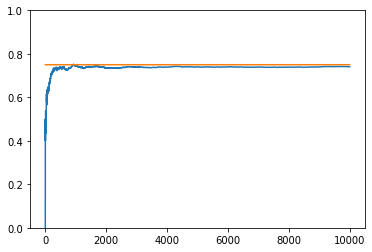

mean estimate:  0.72
total reward earned: 7407.0
overall win rate: 0.7407
num times selected each bandit: [7, 25, 9971]


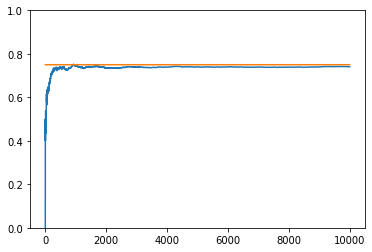

mean estimate:  0.7420519506569059
total reward earned: 7407.0
overall win rate: 0.7407
num times selected each bandit: [7, 25, 9971]


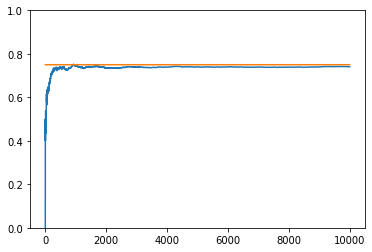

In [19]:
class Bandit:
  def __init__(self,p):
    #p is the win probability
    self.p = p
    self.p_estimate = 5
    self.N = 1

  def pull(self):
    return np.random.random() < self.p
  
  def update(self,x):
    self.N += 1 
    self.p_estimate = ((self.N-1)*self.p_estimate + x) /self.N

def experiment():
  bandits = [Bandit(p) for p in Bandit_probabilities]

  rewards = np.zeros(Num_trials)
  for i in range(Num_trials):
    #use optimistic values to select the next bandit
    j = np.argmax([b.p_estimate for b in bandits])

    x = bandits[j].pull()

    #update rewards log
    rewards[i] = x

    bandits[j].update(x)

  for b in bandits:
    print('mean estimate: ', b.p_estimate)

    #total print reward
    print('total reward earned:',rewards.sum())
    print("overall win rate:", rewards.sum()/ Num_trials)
    print('num times selected each bandit:', [b.N for b in bandits])

    cumulative_rewards = np.cumsum(rewards)
    win_rates = cumulative_rewards/(np.arange(Num_trials) +1)
    plt.ylim([0,1])
    plt.plot(win_rates)
    plt.plot(np.ones(Num_trials)*np.max(Bandit_probabilities))
    plt.show()

if __name__ == '__main__':
  experiment()